In [2]:
"""
import library
"""
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


E:\Continuum\anaconda3\envs\tf2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv('AirPassengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:

#Split data int train and test in the ration of 80/20
 
 
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("train_data_size: "+str(len(train)), " test_data_size: "+str(len(test)))


train_data_size: 112  test_data_size: 29


In [6]:
# convert array to matrix
def create_dataset(dataset, steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-steps-1):
        a = dataset[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + steps, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
steps = 1
trainX, trainY = create_dataset(train, steps)
testX, testY = create_dataset(test, steps)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

""" The network has a visible layer with 1 input, a hidden layer with
4 LSTM blocks or neurons and an output layer that makes a single value
prediction. The default sigmoid activation function is used for the
LSTM blocks. The network is trained for 100 epochs and a batch size of
1 is used."""

# create and fit the LSTM network


In [8]:
layers = [
    tf.keras.layers.LSTM(4, input_shape=(1,1),return_sequences=True),
    tf.keras.layers.Dense(units=1)
]

In [9]:
model = tf.keras.Sequential(layers)

In [10]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

W0412 09:47:14.979501  6340 training.py:686] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
110/110 - 1s - loss: 0.0674
Epoch 2/100
110/110 - 0s - loss: 0.0344
Epoch 3/100
110/110 - 0s - loss: 0.0253
Epoch 4/100
110/110 - 0s - loss: 0.0223
Epoch 5/100
110/110 - 0s - loss: 0.0205
Epoch 6/100
110/110 - 0s - loss: 0.0188
Epoch 7/100
110/110 - 0s - loss: 0.0169
Epoch 8/100
110/110 - 0s - loss: 0.0153
Epoch 9/100
110/110 - 0s - loss: 0.0134
Epoch 10/100
110/110 - 0s - loss: 0.0115
Epoch 11/100
110/110 - 0s - loss: 0.0100
Epoch 12/100
110/110 - 0s - loss: 0.0083
Epoch 13/100
110/110 - 0s - loss: 0.0068
Epoch 14/100
110/110 - 0s - loss: 0.0056
Epoch 15/100
110/110 - 0s - loss: 0.0046
Epoch 16/100
110/110 - 0s - loss: 0.0039
Epoch 17/100
110/110 - 0s - loss: 0.0033
Epoch 18/100
110/110 - 0s - loss: 0.0029
Epoch 19/100
110/110 - 0s - loss: 0.0027
Epoch 20/100
110/110 - 0s - loss: 0.0026
Epoch 21/100
110/110 - 0s - loss: 0.0025
Epoch 22/100
110/110 - 0s - loss: 0.0026
Epoch 23/100
110/110 - 0s - loss: 0.0025
Epoch 24/100
110/110 - 0s - loss: 0.0025
Epoch 25/100
110/110 - 0s

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [12]:
#testPredict.shape
trainPredict.shape


(110, 1, 1)

In [13]:
testY.shape

(27,)

In [14]:
# invert predictions
trainPredict = scaler.inverse_transform(tf.reshape(trainPredict,[110,1]))
trainY = scaler.inverse_transform(tf.reshape(trainY,[110,1]))
testPredict = scaler.inverse_transform(tf.reshape(testPredict,[27,1]))
testY = scaler.inverse_transform(tf.reshape(testY,[27,1]))

In [15]:
testY.shape

(27, 1)

In [16]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print(trainY[0])
print(trainPredict[:,0])
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print(testY[0])
print(testPredict[:,0])
print('Test Score: %.2f RMSE' % (testScore))


[117.99999916]
[115.89208126 121.59034957 135.02632479 132.13168155 124.45350589
 137.92887981 150.59068624 150.59068624 138.89810657 122.54373349
 108.355727   121.59034957 118.73645292 129.24522796 143.75652487
 137.92887981 128.28496079 151.56988184 172.27360281 172.27360281
 160.41214348 135.99297734 117.78726223 142.78323416 147.65734865
 152.54976055 180.21762365 165.34541873 174.25722677 180.21762365
 201.15921108 201.15921108 186.19037833 164.35766684 148.63440614
 168.31173104 173.26519867 182.20729915 195.16696642 183.20262319
 185.19418207 220.14415948 232.11542648 244.04854716 211.15231903
 193.17072994 174.25722677 196.1653471  198.16251756 198.16251756
 238.08793416 237.09328938 231.11903725 245.04066017 265.76616747
 273.5955641  239.08227018 213.15099466 182.20729915 203.15749304
 206.15536754 190.17778004 237.09328938 229.12543288 236.09828953
 265.76616747 302.53233258 293.92880189 260.85265622 231.11903725
 205.15604516 231.11903725 244.04854716 235.10301181 268.7070

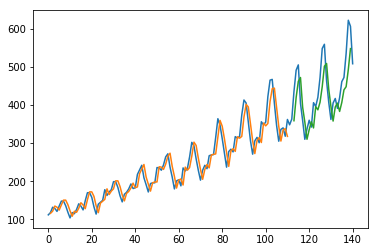

In [17]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[steps:len(trainPredict)+steps, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(steps*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()